<a href="https://colab.research.google.com/github/rajputvivek07/Data-Analysis/blob/main/Vivek_46_DA_Lab4_climate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OEIT6, Data Analytics 2022

Name : Vivek Rajput

UID No. : 2019110046

Class : BE ETRX

Date : 05/10/2022

Lab 3: Linear Regression

---

**Objective:**

Building Linear Regression model for given dataset. 

---



**Theory**
>> ***Climate Change***

There have been many studies documenting that the average global temperature has been increasing over the last century. The consequences of a continued rise in global temperature will be dire. Rising sea levels and an increased frequency of extreme weather events will affect billions of people.
In this problem, we will attempt to study the relationship between average global temperature and several other factors.
The file climate_change (CSV placed in lab folder) contains climate data from May 1983 to December 2008. The available variables include:
    Year: the observation year.
    Month: the observation month.
    Temp: the difference in degrees Celsius between the average global temperature in that 
period and a reference value. This data comes from the Climatic Research Unit at the University 
of East Anglia.
    CO2, N2O, CH4, CFC.11, CFC.12: atmospheric concentrations of carbon dioxide (CO2), 
nitrous oxide (N2O), methane  (CH4), trichlorofluoromethane (CCl3F; commonly referred to as 
CFC-11) and dichlorodifluoromethane (CCl2F2; commonly referred to as CFC-12), respectively. 
This data comes from the ESRL/NOAA Global Monitoring Division.
    CO2, N2O and CH4 are expressed in ppmv (parts per million by volume  -- i.e., 397 ppmv of 
CO2 means that CO2 constitutes 397 millionths of the total volume of the atmosphere)
    CFC.11 and CFC.12 are expressed in ppbv (parts per billion by volume). 
    Aerosols: the mean stratospheric aerosol optical depth at 550 nm. This variable is linked to 
volcanoes, as volcanic eruptions result in new particles being added to the atmosphere, which 
affect how much of the sun's energy is reflected back into space. This data is from the Godard 
Institute for Space Studies at NASA.
    TSI: the total solar irradiance (TSI) in W/m2 (the rate at which the sun's energy is deposited 
per unit area). Due to sunspots and other solar phenomena, the amount of energy that is given 
off by the sun varies substantially with time. This data is from the SOLARIS-HEPPA project 
website.

---



**Procedure and To solve the given Problem** 

>> *Problem 1.1 - Creating Our First Model*
We are interested in how changes in these variables affect future temperatures, as well as how 
well these variables explain temperature changes so far. To do this, first read the dataset 
climate_change.csv into Python.
Then, split the data into a training set, consisting of all the observations up to and including 
2006, and a testing set consisting of the remaining years (hint: use subset). A training set refers 
to the data that will be used to build the model, and a testing set refers to the data we will use to 
test our predictive ability.
Next, build a linear regression model to predict the dependent variable Temp, using MEI, CO2, 
CH4, N2O, CFC.11, CFC.12, TSI, and Aerosols as independent variables (Year and Month 
should NOT be used in the model). Use the training set to build the model.
Enter the model R2 (the "Multiple R-squared" value):

>> *Problem 1.2 - Creating Our First Model*
Which variables are significant in the model? We will consider a variable signficant only if the 
p-value is below 0.05. (Select all that apply.)
a) MEI b) CO2 c) CH4 d) N2O e) CFC.11 f) CFC.12 g) TSI h) Aerosols

>> *Problem 2.1 - Understanding the Model*
Current scientific opinion is that nitrous oxide and CFC-11 are greenhouse gases: gases that 
are able to trap heat from the sun and contribute to the heating of the Earth. However, the 
regression coefficients of both the N2O and CFC-11 variables are negative, indicating that 
increasing atmospheric concentrations of either of these two compounds is associated with 
lower global temperatures.

---

**Code and Output**

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from contextlib import contextmanager
from time import time


In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

**Data preparation **

>> Data Gather or Data Understand

In [3]:
data = pd.read_csv("climate_change.csv")
data.info

<bound method DataFrame.info of      Year  Month    MEI     CO2      CH4      N2O   CFC-11   CFC-12  \
0    1983      5  2.556  345.96  1638.59  303.677  191.324  350.113   
1    1983      6  2.167  345.52  1633.71  303.746  192.057  351.848   
2    1983      7  1.741  344.15  1633.22  303.795  192.818  353.725   
3    1983      8  1.130  342.25  1631.35  303.839  193.602  355.633   
4    1983      9  0.428  340.17  1648.40  303.901  194.392  357.465   
..    ...    ...    ...     ...      ...      ...      ...      ...   
303  2008      8 -0.266  384.15  1779.88  321.405  244.200  535.072   
304  2008      9 -0.643  383.09  1795.08  321.529  244.083  535.048   
305  2008     10 -0.780  382.99  1814.18  321.796  244.080  534.927   
306  2008     11 -0.621  384.13  1812.37  322.013  244.225  534.906   
307  2008     12 -0.666  385.56  1812.88  322.182  244.204  535.005   

           TSI  Aerosols   Temp  
0    1366.1024    0.0863  0.109  
1    1366.1208    0.0794  0.118  
2    1366.285

In [4]:
data[0:2].T

,0,1
Year,1983.0000,1983.0000
Month,5.0000,6.0000
MEI,2.5560,2.1670
CO2,345.9600,345.5200
CH4,1638.5900,1633.7100
N2O,303.6770,303.7460
CFC-11,191.3240,192.0570
CFC-12,350.1130,351.8480
TSI,1366.1024,1366.1208
Aerosols,0.0863,0.0794


In [5]:
data.head()      # top five rows

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [6]:
data.tail()       # bottom five rows

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
303,2008,8,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,2008,9,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,2008,10,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,2008,11,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394
307,2008,12,-0.666,385.56,1812.88,322.182,244.204,535.005,1365.6926,0.0046,0.330


In [7]:
data.shape          # Total no. of rows and columns

(308, 11)

In [8]:
data.describe    # Shows the data inside along with max. & min. , mean, deviation

<bound method NDFrame.describe of      Year  Month    MEI     CO2      CH4      N2O   CFC-11   CFC-12  \
0    1983      5  2.556  345.96  1638.59  303.677  191.324  350.113   
1    1983      6  2.167  345.52  1633.71  303.746  192.057  351.848   
2    1983      7  1.741  344.15  1633.22  303.795  192.818  353.725   
3    1983      8  1.130  342.25  1631.35  303.839  193.602  355.633   
4    1983      9  0.428  340.17  1648.40  303.901  194.392  357.465   
..    ...    ...    ...     ...      ...      ...      ...      ...   
303  2008      8 -0.266  384.15  1779.88  321.405  244.200  535.072   
304  2008      9 -0.643  383.09  1795.08  321.529  244.083  535.048   
305  2008     10 -0.780  382.99  1814.18  321.796  244.080  534.927   
306  2008     11 -0.621  384.13  1812.37  322.013  244.225  534.906   
307  2008     12 -0.666  385.56  1812.88  322.182  244.204  535.005   

           TSI  Aerosols   Temp  
0    1366.1024    0.0863  0.109  
1    1366.1208    0.0794  0.118  
2    1366.2

In [9]:
data.columns       # All the columns

Index(['Year', 'Month', 'MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI',
       'Aerosols', 'Temp'],
      dtype='object')

In [10]:
data.nunique()     # How many unique values a particular attribute

Year         26
Month        12
MEI         294
CO2         298
CH4         303
N2O         304
CFC-11      307
CFC-12      307
TSI         302
Aerosols    155
Temp        242
dtype: int64



---


>> Cleaning the data



In [11]:
data.isnull().sum() # total number of null values in dataset along with the columns

Year        0
Month       0
MEI         0
CO2         0
CH4         0
N2O         0
CFC-11      0
CFC-12      0
TSI         0
Aerosols    0
Temp        0
dtype: int64

In [12]:
data.dropna()    # rows containing null values

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...,...,...
303,2008,8,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,2008,9,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,2008,10,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,2008,11,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394




---
>> Analyze the data


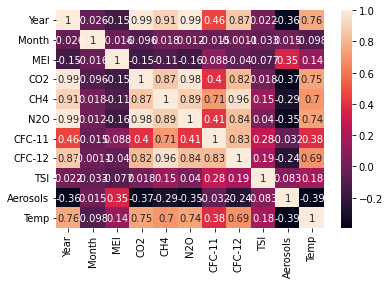

In [13]:
correlation = data.corr()
sns.heatmap(correlation,xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

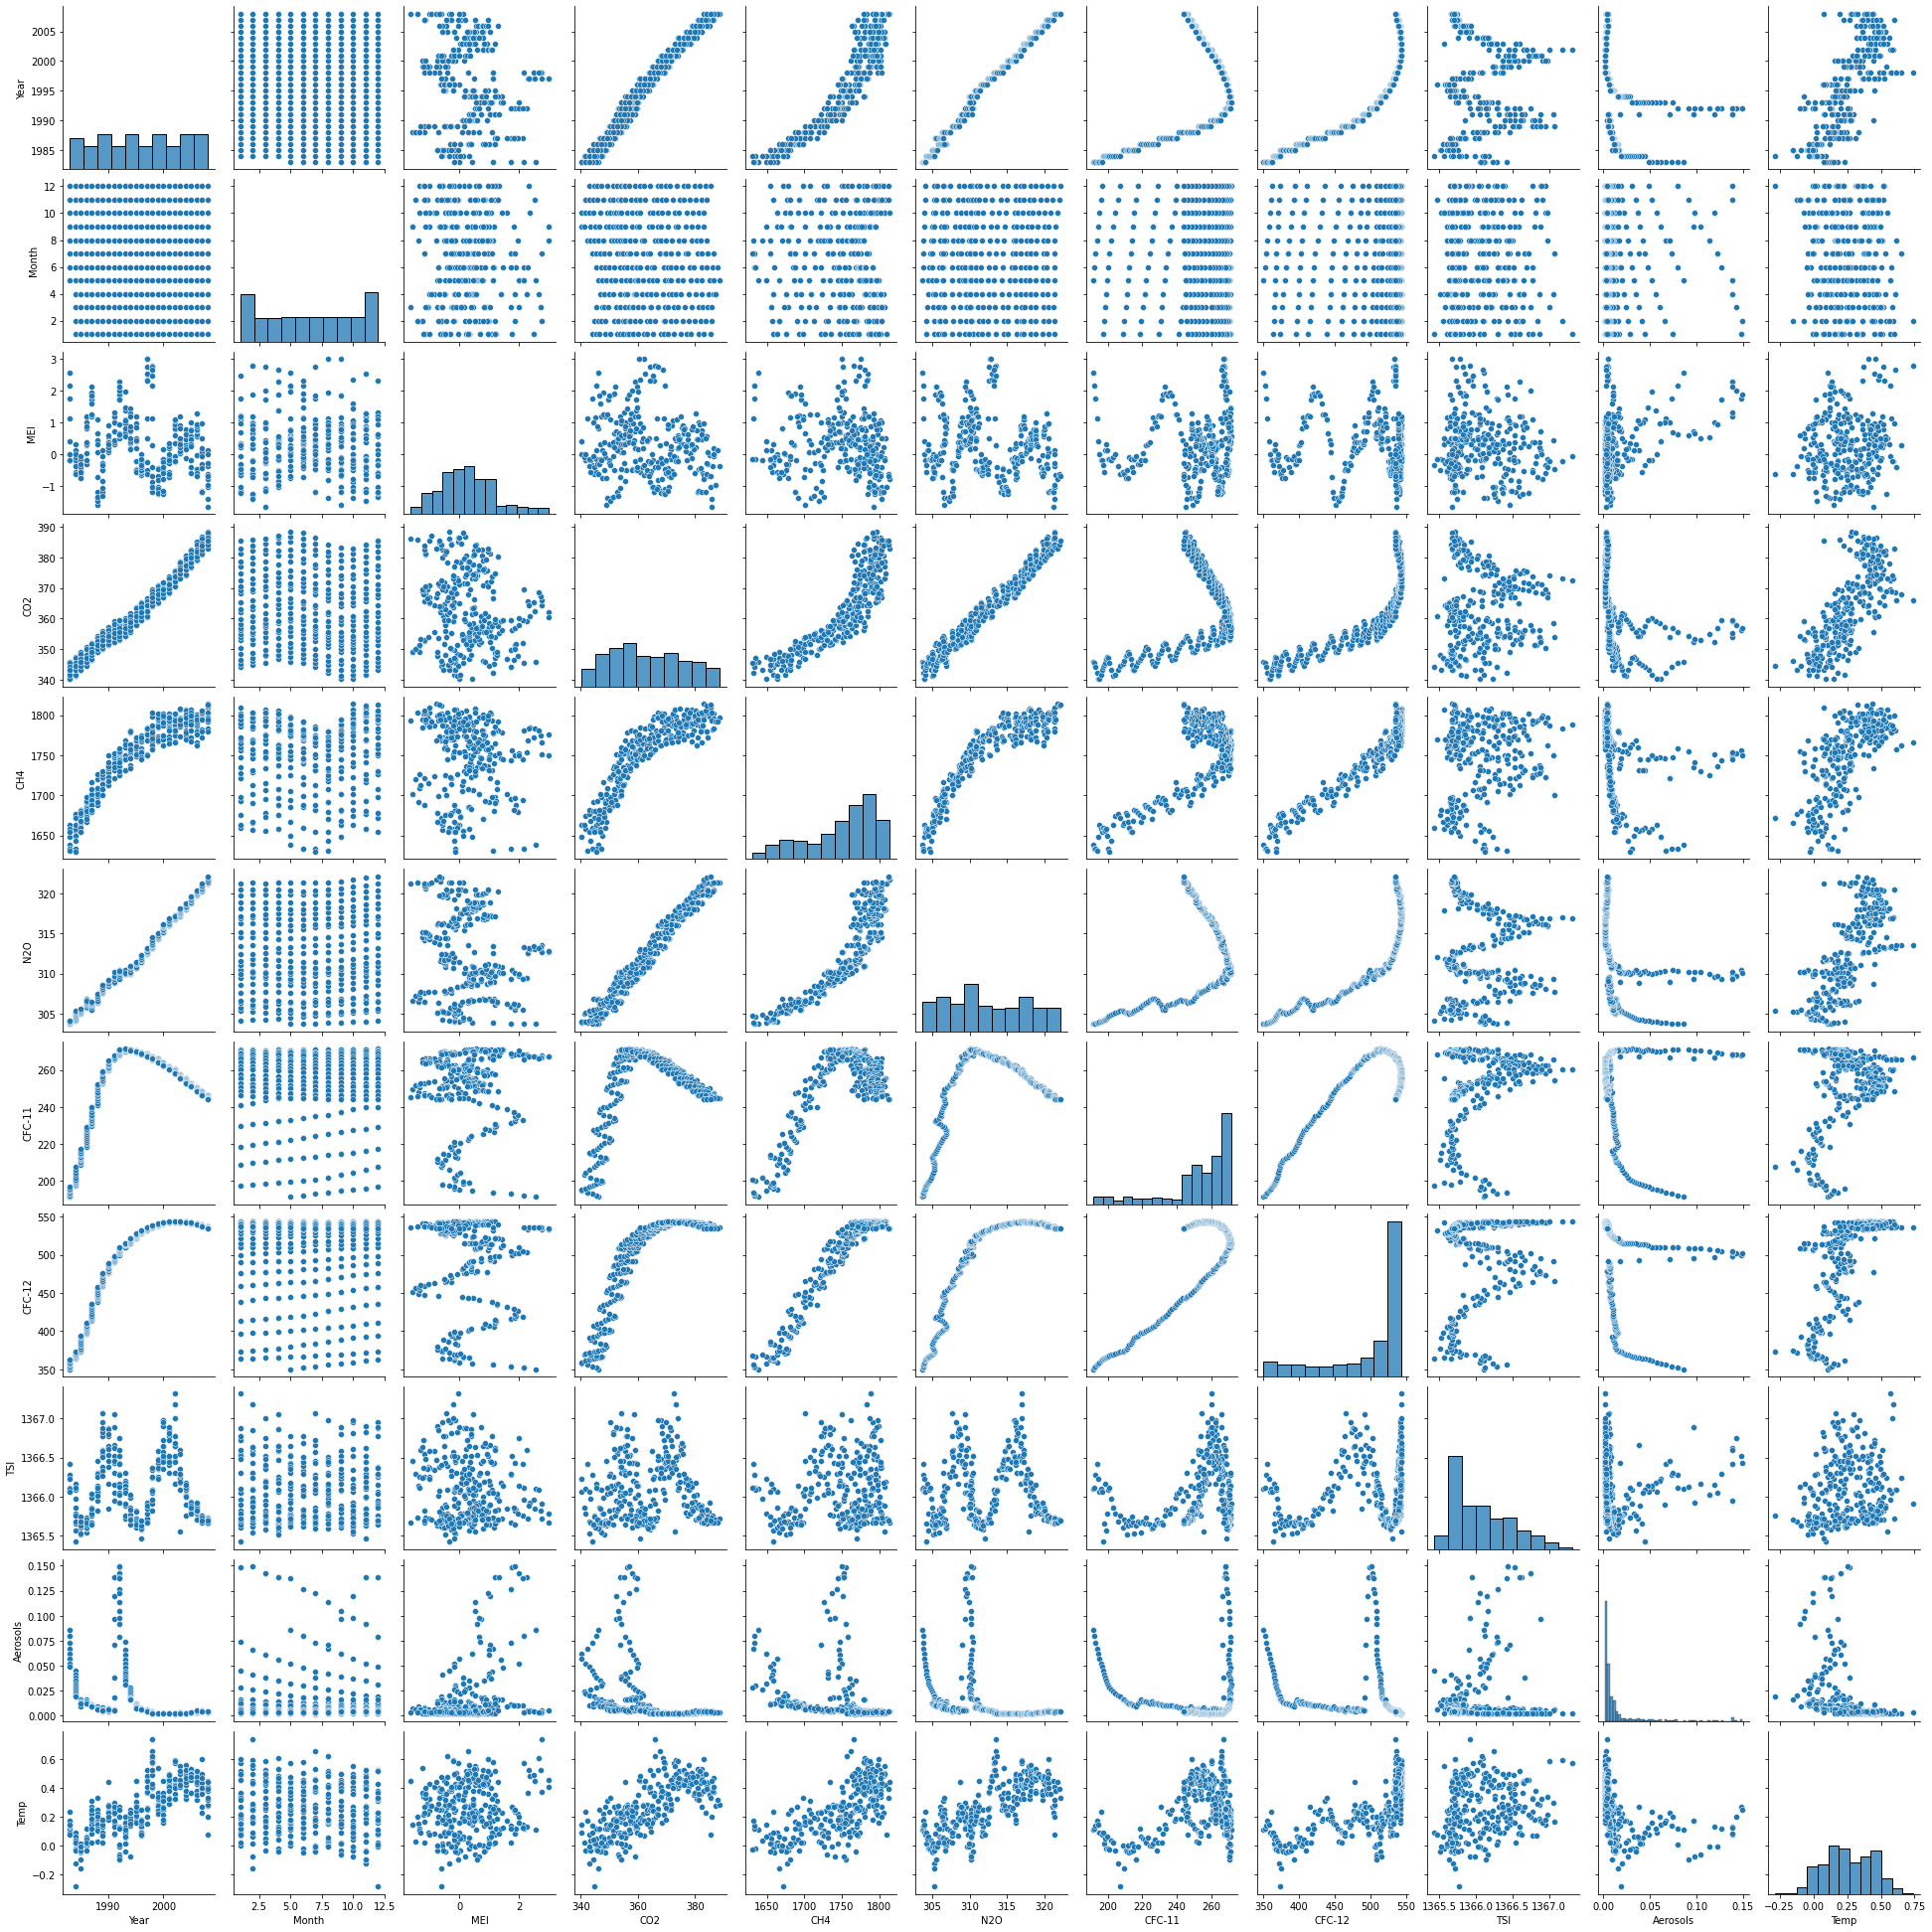

In [14]:
from seaborn.axisgrid import pairplot
pairplot(data)



---


**Part 1:**

In [15]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x= data.iloc[:, [0,1,2,3,4,5,6,7,8,9]].values  
y= data.iloc[:, 10].values
print(x)

[[ 1.9830000e+03  5.0000000e+00  2.5560000e+00 ...  3.5011300e+02
   1.3661024e+03  8.6300000e-02]
 [ 1.9830000e+03  6.0000000e+00  2.1670000e+00 ...  3.5184800e+02
   1.3661208e+03  7.9400000e-02]
 [ 1.9830000e+03  7.0000000e+00  1.7410000e+00 ...  3.5372500e+02
   1.3662850e+03  7.3100000e-02]
 ...
 [ 2.0080000e+03  1.0000000e+01 -7.8000000e-01 ...  5.3492700e+02
   1.3656759e+03  4.6000000e-03]
 [ 2.0080000e+03  1.1000000e+01 -6.2100000e-01 ...  5.3490600e+02
   1.3657065e+03  4.8000000e-03]
 [ 2.0080000e+03  1.2000000e+01 -6.6600000e-01 ...  5.3500500e+02
   1.3656926e+03  4.6000000e-03]]


In [ ]:
print(y)

[ 0.109  0.118  0.137  0.176  0.149  0.093  0.232  0.078  0.089  0.013
  0.049 -0.019  0.065 -0.016 -0.024  0.034  0.025 -0.035 -0.123 -0.282
 -0.001 -0.155 -0.032 -0.042  0.001 -0.049 -0.042  0.013 -0.035 -0.008
 -0.093 -0.002  0.121  0.065  0.049  0.045  0.023  0.055  0.004 -0.001
  0.016  0.043 -0.033  0.022  0.116  0.266  0.021  0.084  0.145  0.121
  0.238  0.219  0.25   0.174  0.186  0.314  0.334  0.189  0.248  0.224
  0.175  0.2    0.168  0.154  0.149  0.12   0.027  0.106  0.019  0.094
  0.088  0.083  0.073  0.094  0.167  0.168  0.135  0.145  0.067  0.181
  0.187  0.242  0.442  0.285  0.231  0.233  0.196  0.227  0.179  0.271
  0.278  0.199  0.224  0.272  0.161  0.299  0.249  0.269  0.271  0.225
  0.176  0.133  0.079  0.084  0.266  0.25   0.199  0.132  0.125  0.118
 -0.008 -0.007 -0.062 -0.072 -0.097  0.007  0.204  0.161  0.202  0.121
  0.158  0.122  0.088  0.06   0.013  0.061 -0.041  0.111  0.16  -0.072
  0.176  0.173  0.218  0.191  0.141  0.175  0.156  0.23   0.248  0.227
  0.34

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
regression = LinearRegression()
  
regression.fit(x_train, y_train)
print(regression.score(x_test, y_test))

0.7426128935905651


In [ ]:
x_test.shape


(77, 10)

In [ ]:
y_test.shape


(77,)

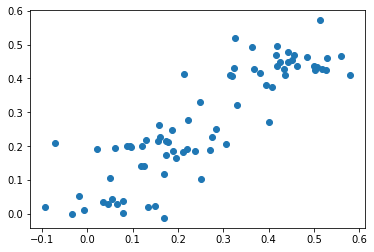

In [ ]:
y_pred = regression.predict(x_test)
g=plt.scatter(y_test, y_pred)

In [ ]:
data.columns

Index(['Year', 'Month', 'MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI',
       'Aerosols', 'Temp'],
      dtype='object')

In [ ]:
import lightgbm as lgbm
from sklearn.metrics import mean_squared_error

def fit_lgbm(X, y, cv, 
             params: dict=None, 
             verbose: int=50):

    if params is None:
        params = {}

    models = []
    oof_pred = np.zeros_like(y, dtype=np.float)

    for i, (idx_train, idx_valid) in enumerate(cv): 
        x_train, y_train = X[idx_train], y[idx_train]
        x_valid, y_valid = X[idx_valid], y[idx_valid]

        clf = lgbm.LGBMRegressor(**params)
        
        with Timer(prefix='fit fold={} '.format(i)):
            clf.fit(x_train, y_train, 
                    eval_set=[(x_valid, y_valid)],
                    early_stopping_rounds=100,
                    verbose=verbose)

        pred_i = clf.predict(x_valid)
        oof_pred[idx_valid] = pred_i
        models.append(clf)
        print(f'Fold {i} RMSLE: {mean_squared_error(y_valid, pred_i) ** .5:.4f}')
        print()

    score = mean_squared_error(y, oof_pred) ** .5
    print('-' * 50)
    print('FINISHED | Whole RMSLE: {:.4f}'.format(score))
    return oof_pred, models  

In [ ]:
params = {
    'objective': 'rmse', 
    'learning_rate': .1,
    'reg_lambda': 1.,
    'reg_alpha': .1,
    'max_depth': 5, 
    'n_estimators': 10000, 
    'colsample_bytree': .5, 
    'min_child_samples': 10,
    'subsample_freq': 3,
    'subsample': .9,
    'importance_type': 'gain', 
    'random_state': 71,
    'num_leaves': 62
}

In [ ]:
data1=data.copy()
m=len(data1)
M=list(range(m))
random.seed(2021)
random.shuffle(M)
target=['Temp']
dataY=data1[target]
dataX=data1.drop(target,axis=1)
df_columns = list(dataX.columns)
print(df_columns)

['Year', 'Month', 'MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols']


In [ ]:
trainX=dataX.iloc[M[0:(m//4)*3]]
trainY=dataY.iloc[M[0:(m//4)*3]]
testX=dataX.iloc[M[(m//4)*3:]]
testY=dataY.iloc[M[(m//4)*3:]]


In [ ]:
train_df=trainX
test_df=testX


In [ ]:
train_df.columns=df_columns

y = trainY
ydf=pd.DataFrame(y)
ydf

,Temp
107,0.132
300,0.283
18,-0.123
170,0.372
80,0.187
...,...
254,0.380
215,0.426
157,0.159
34,0.049


In [16]:
data_train=data[data.Year<=2006]
data_test=data[data.Year>2006]


In [17]:
data=data.drop(['Year','Month'],axis=1)
data_train=data_train.drop(['Year','Month'],axis=1)
data_test=data_test.drop(['Year','Month'],axis=1)

In [ ]:
data.describe()

In [ ]:
data.info()

In [ ]:
data.nunique()

In [ ]:
data.isnull().sum()

In [19]:
from sklearn import datasets, linear_model, metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_squared_error
  
# load the boston dataset
# defining feature matrix(X) and response vector(y)

X_train = pd.DataFrame(data_train, columns=['MEI','CO2', 'CH4', 'N2O', 'CFC-11','CFC-12','TSI','Aerosols'])
y_train=data_train['Temp']
X_test = pd.DataFrame(data_test, columns=['MEI','CO2', 'CH4', 'N2O', 'CFC-11','CFC-12','TSI','Aerosols'])
y_test=data_test['Temp']


  
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27,
                                                    #random_state=1)
  
# create linear regression object
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(X_train, y_train)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_train, y_train)))
y_pred = reg.predict(X_test)
errors = mean_squared_error(y_test,y_pred)
print("Mean Squared error: ",errors)


Variance score: 0.7508932770523429
Mean Squared error:  0.009097810529180444


**Q.1 **

>> The variance score [R2 value] is 0.7508

>> Mean squared error : 0.0909



---


**Part 2 :**

In [20]:
import statsmodels.api as sm
  
datavar = pd.DataFrame(data, columns=['MEI','CO2', 'CH4', 'N2O', 'CFC-11','CFC-12','TSI','Aerosols'])
target=data['Temp']
X = datavar
y = target
  
X_train,X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.1, random_state = 10)
x_incl_cons = sm.add_constant(X)
model = sm.OLS(y, x_incl_cons)  #ordinary least square
results = model.fit()  #regresssion results
pd.DataFrame({'coef': results.params , 'pvalue': round(results.pvalues,3)})

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,coef,pvalue
const,-127.695776,0.000
MEI,0.066322,0.000
CO2,0.005207,0.018
CH4,0.000064,0.898
N2O,-0.016929,0.032
CFC-11,-0.007278,0.000
CFC-12,0.004272,0.000
TSI,0.095862,0.000
Aerosols,-1.581837,0.000


**Q.2**

Creating Our First Model Which variables are significant in the model? We will consider a variable signficant only if the p-value is below 0.05. (Select all that apply.) a) MEI b) CO2 c) CH4 d) N2O e) CFC.11 f) CFC.12 g) TSI h) Aerosols

>> significant variables: MEI; CO2; N2O; CFC-11; CFC-12;

>> The p values for CH4 and N2O are greater than 0.05 hence indicating that these attributes are insignificant.

>> The sample size taken is the entire training sample.

>> P value for CH4 = 0.898

>> p value for N2O = 0.032


---

**Part 3:**



In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
data.columns
data = pd.read_csv("climate_change.csv")
#Extracting independent and dependent Variable  
x= data.iloc[:, [0,1,2,3,4,5,6,7,8,9]].values  
y= data.iloc[:, 10].values

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
regr = LinearRegression()
  
regr.fit(x_train, y_train)
print(regr.score(x_test, y_test))

0.7472269384917418


In [32]:
import statsmodels.api as sm

datavar = pd.DataFrame(data, columns=['MEI', 'CH4', 'N2O', 'CFC-11','CFC-12','TSI','Aerosols'])
target=data['Temp']
X = datavar
y = target
  
X_train,X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.1, random_state = 10)
x_incl_cons = sm.add_constant(X)
model = sm.OLS(y, x_incl_cons)  #ordinary least square
results = model.fit()  #regresssion results

pd.DataFrame({'coef': results.params , 'pvalue': round(results.pvalues,3)})

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,coef,pvalue
const,-125.086848,0.000
MEI,0.066999,0.000
CH4,-0.000067,0.893
N2O,-0.004911,0.416
CFC-11,-0.007409,0.000
CFC-12,0.004433,0.000
TSI,0.092722,0.000
Aerosols,-1.643945,0.000


**Q.2 **

Current scientific opinion is that nitrous oxide and CFC-11 are greenhouse gases: gases that are able to trap heat from the sun and contribute to the heating of the Earth. However, the regression coefficients of both the N2O and CFC-11 variables are negative, indicating that increasing atmospheric concentrations of either of these two compounds is associated with lower global temperatures. Which of the following is the simplest correct explanation for this contradiction?

**ANSWER:** 
>> All of the gas concentration variables reflect human development - N2O and CFC.11 are correlated with other variables in the data set. We can see that both of them are higly correlated to the CO2 concetration of the atmospehere. Maybe, if we only take N2O or CFC11 individually, without CO2, they might recioeve positive regg. coeff.

1. Climate scientists are wrong that N2O and CFC-11 are greenhouse gases - this regression analysis constitutes part of a disproof.
>> Can be rejected since the data was fit using the model and the coefficients of each of the N2O and CH4 are found to be negative supporting the given argument.

2. There is not enough data, so the regression coefficients being estimated are not accurate
>> Can be rejected given the model accuracy and the dataset used. The accuracy is quite high and the dataset used is large enough to support the argument.

3. All of the gas concentration variables reflect human development - N2O and CFC.11 are correlated with other variables in the data set.
>> Is true since the correlation matrix shows N2O and CFC 11 are highly correlated with the other features of the dataset since the coefficient values are quite high.

---



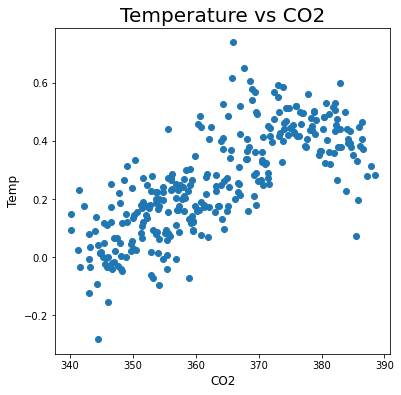

In [33]:
fig,ax = plt.subplots(figsize=(6,6))
ax.set_title('Temperature vs CO2',fontsize=20)
ax.set_xlabel('CO2',fontsize=12)
ax.set_ylabel('Temp',fontsize=12)
ax.scatter(data['CO2'],data['Temp'])

In [34]:
data2=data[['Year','CO2','CFC-12','Temp']].groupby('Year',as_index=False).mean()
fig=make_subplots(specs=[[{"secondary_y":True}]])
fig.add_trace(go.Scatter(x=data2['Year'],y=data2['CO2'],name='CO2'),secondary_y=True,)
fig.add_trace(go.Scatter(x=data2['Year'],y=data2['Temp'],name='Temperature'),secondary_y=False,)
fig.update_layout(autosize=False,width=600,height=400,title_text="C02 and Temperature Change")
fig.update_xaxes(title_text="Year")
fig.update_yaxes(title_text="Temp",secondary_y=False)
fig.update_yaxes(title_text="CO2",secondary_y=True)
fig.show()



---


**Learning Outcomes **

>> We learned about various features, parameters, functions, and Models.

>> In this problem, we will attempt to study the relationship between average global temperature and several other factors.

1.   Climate scientists are wrong that N2O and CFC-11 are greenhouse gases - this 
regression analysis constitutes part of a disproof.

2.   All of the gas concentration variables reflect human development - N2O and CFC.11 are 
correlated with other variables in the data set.





---

